In [2]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

import glob
import pandas

<IPython.core.display.Javascript object>

`%matplotlib` prevents importing * from pylab and numpy


Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-step-shear
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-step-shear
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
Ls = [300,370,340]
Aj = 140000 #118125/0.842
print Aj

for c,L in zip(sorted(glob.glob(r"C:\Users\Deen\Dropbox\PhD bubbles\firstframes\20150126\*.csv")), Ls):
    rs = pandas.read_csv(c).r
    rs = rs[isfinite(rs)]
    Atot = np.sum(np.pi * (rs+1.2)**2)
    
    phi = Atot/L**2
    print Atot, phi, 0.842*(Aj/L**2)

140000
98782.1916572 1.0975799073 0.842
118125.959481 0.862863107968 0.842
119633.773843 1.0348942374 0.842


In [4]:
from scipy.ndimage.interpolation import affine_transform

base = r"U:\Backup E\E\Merlijn\20150126 lin gamma steps en betere imaging"

# from Stap 1 - crop en affine correctie.ipynb
px_per_tick = 0.00042
x0 = 380
y0 = 849   # [849:430:-1,380:900:]

# L0 = 300px in beide richtingen, dus...
# Btick = -23806 ticks is 300px is lB = 714285 ticks
# zeroCD is hetzelfde. Denk ik...

zeroB = 714285 + 23806.00000 
zeroCD = 714285 + 23806.00000

def load_im(path, Bpos, CDpos, frame_id, t, do_affine_transform=True):
    Btarget = CDtarget = 200
    
    im = plt.imread(path + "/%05i.png" % frame_id[t])

    im = im[y0::-1,x0:]

    lB = (zeroB + Bpos[t]) * px_per_tick
    lCD = (zeroCD + CDpos[t]) * px_per_tick

    im = im[:lB+2, :lCD+2]

    Bfactor = lB/Btarget
    CDfactor = lCD/CDtarget
    
    if affine_transform:
        return affine_transform(im, [Bfactor, CDfactor], output_shape=(Btarget, CDtarget), order=1)
    else:
        return im

In [5]:
paths = [x for x in glob.glob(base + "/201*") if ".png" not in x and ".gif" not in x]
paths[:10]

['U:\\Backup E\\E\\Merlijn\\20150126 lin gamma steps en betere imaging\\20150127T132818~A7.500000E-1~w1.000000E-1',
 'U:\\Backup E\\E\\Merlijn\\20150126 lin gamma steps en betere imaging\\20150127T140822~A1.500000E+0~w1.000000E-1',
 'U:\\Backup E\\E\\Merlijn\\20150126 lin gamma steps en betere imaging\\20150127T144822~A2.250000E+0~w6.666667E-2',
 'U:\\Backup E\\E\\Merlijn\\20150126 lin gamma steps en betere imaging\\20150127T152821~A3.000000E+0~w5.000000E-2',
 'U:\\Backup E\\E\\Merlijn\\20150126 lin gamma steps en betere imaging\\20150127T160824~A3.750000E+0~w4.000000E-2',
 'U:\\Backup E\\E\\Merlijn\\20150126 lin gamma steps en betere imaging\\20150127T164823~A4.500000E+0~w3.333333E-2',
 'U:\\Backup E\\E\\Merlijn\\20150126 lin gamma steps en betere imaging\\20150127T180218~A9.250000E-1~w1.000000E-1',
 'U:\\Backup E\\E\\Merlijn\\20150126 lin gamma steps en betere imaging\\20150127T184222~A1.850000E+0~w1.000000E-1',
 'U:\\Backup E\\E\\Merlijn\\20150126 lin gamma steps en betere imaging\\

for path in paths:
    print path

    if os.path.exists(path + '/alldiffdata.csv') or False:
        ts, frame_id, Bpos, CDpos = np.loadtxt(path + "/position.csv").T
        diffdata = pandas.read_csv(path + "/diffdata.csv", skiprows=4).rename(columns=lambda x: x.strip())
        diffdata['vsprev'] = np.nan
        diffdata['vsnext'] = np.nan

        dd = np.diff(np.int_(np.diff(diffdata["frameno"]) > 10))

        begins = np.where(dd > 0)[0]+1
        ends = np.where(dd < 0)[0]


        # calculate relaxation for each step
        for (begin,end) in zip(begins, ends):
            first = load_im(path, Bpos, CDpos, frame_id, begin)
            last = load_im(path, Bpos, CDpos, frame_id, end)

            yvals = []
            xvals = []
            ids = np.arange(begin, end+1)
            xvals = ts[ids]
            for i in ids:
                frame = load_im(path, Bpos, CDpos, frame_id, i)
                diffdata["vsprev"].iloc[i] = np.mean((frame - first)**2)
                diffdata["vsnext"].iloc[i] = np.mean((frame - last)**2)

        diffdata.to_csv(path + '/alldiffdata.csv')

3.1022
0.000266001010804
0.0
0
0 [  5.04510736e-05   6.69971317e+00]
302.1153
0.000898803415453
0.0
0 [  1.50862600e-04   6.94453268e+00]
6
6 [  1.41799304e-04   4.23401606e+01]
6 [  2.65437653e-04   4.49669224e+01]
\includegraphics{notebooks/biax-step-shear/deformation-and-imvar.pdf}


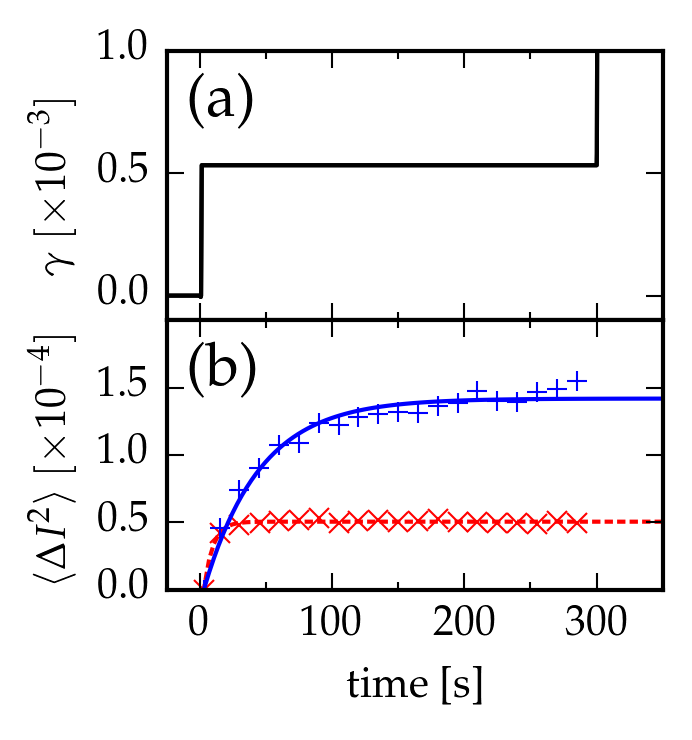

In [8]:
from scipy.optimize import curve_fit
from __future__ import division

halffig()
xmin = -25
xmax = 350
ax1 = plt.subplot(211)
ax1.axis(xmin=xmin, xmax=xmax, ymin=-0.0001, ymax=0.001)
yt = np.array([0,0.0005,0.001])
ax1.set_yticks(yt)
ax1.set_yticklabels(yt*1e3)
ax1.set_xticks([0,100,200,300])
ax1.set_xticks([50,150,250,350], minor=True)
ax1.set_xticklabels([])
ax1.set_ylabel(r"$\gamma~[\times 10^{-3}]$")

ax2 = plt.subplot(212)
ax2.axis(xmin=xmin, xmax=xmax, ymin=0, ymax=2e-4)
yt = np.array([0,5e-5,10e-5,15e-5])
ax2.set_yticks(yt)
ax2.set_yticklabels(yt*1e4)
ax2.set_xticks([0,100,200,300])
ax2.set_xticks([50,150,250,350], minor=True)
ax2.set_ylabel(r"$\langle \Delta I^2 \rangle~[\times 10^{-4}]$")
ax2.set_xlabel("time [s]")
reset_subplots_adjust()
subplots_adjust(hspace=0)

def fitfn(t, M, tau):
    return M * (1-np.exp(-(t-t0)/tau))

values = []

for pid,path in enumerate(paths):
    diffdata = pandas.read_csv(path + "/alldiffdata.csv").rename(columns=lambda x: x.strip())
    
    L = (zeroB + diffdata.iloc[0]["ypos"]) * px_per_tick
    dL = (np.amax(diffdata["ypos"]) - np.amin(diffdata["ypos"])) * px_per_tick
    
    dd = np.diff(np.int_(np.diff(diffdata["frameno"]) > 10))
    begins = np.where(dd > 0)[0]+1
    ends = np.where(dd < 0)[0] 
    
    for eid,(b,e) in enumerate(zip(begins, ends)):
        xvals, yvals = diffdata["t"][b:e+1], diffdata["vsprev"][b:e+1]
        
        t0 = np.amin(xvals)
        
        try:
            p, cov = curve_fit(fitfn, xvals, yvals, p0=(np.amax(yvals), 10))
            #print L, dL, p, t0
        except RuntimeError as e:
            print e
            raise

        if dL < 1 and eid in [0,1] and pid < 10:
            if pid == 0:
                t = np.concatenate([arange(-50,0), diffdata["t"]])
                gamma = np.concatenate([
                    [0]*50,
                    (diffdata["xpos"] - diffdata["xpos"][0])*px_per_tick / L
                ])
                print diffdata["t"][b]
                print ((diffdata["xpos"] - diffdata["xpos"][0])*px_per_tick / L)[b+1]
                ax1.plot(t,2*gamma, color='black')
                print (2*gamma)[50]
            if pid == 0:
                color = 'red'
                style = {'dashes': (2,1)}
                marker = "x"
            else:
                color = 'blue'
                style = {}
                marker = "+"
               
            if eid == 0:
                print pid
                ax2.plot(xvals, yvals, color=color, marker=marker, ms=5, linestyle="none")
                x = np.linspace(0, 350, 100)
                ax2.plot(x, fitfn(x, *p), color=color, **style)
            
            print pid, p
        
        values.append((L, dL, p[0], p[1]))
        
subplotlabel('(a)', ax=ax1)
subplotlabel('(b)', ax=ax2)

plt.savefig("deformation-and-imvar.pdf")


In [10]:
Ls,dLs,Is,taus = np.array(values).T
Ls = np.round(Ls, -1)

for i in range(0,49,8):
    print np.mean(np.unique(dLs/Ls)[i:i+8])

validsteps = np.array([0.0014, 0.0041, 0.0065, 0.0091, 0.0119, 0.0144])
markers = '^v<>so'
colors = 'rgbcmy'

gammasteps = validsteps[np.argmin(((dLs/Ls) - validsteps[:, np.newaxis])**2, axis=0)]

0.00143690413831
0.00411197489331
0.00650446914707
0.00918294469269
0.0118690732676
0.0144105823171
nan


C:\Python27\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


TransformedBbox(Bbox([[0.8542, 0.19], [0.94, 0.94]]), BboxTransformTo(TransformedBbox(Bbox([[0.0, 0.0], [2.3961634386, 2.3961634386]]), Affine2D(array([[ 80.,   0.,   0.],
       [  0.,  80.,   0.],
       [  0.,   0.,   1.]])))))
\includegraphics{notebooks/biax-step-shear/tau-vs-phi-log-errorbars.pdf}


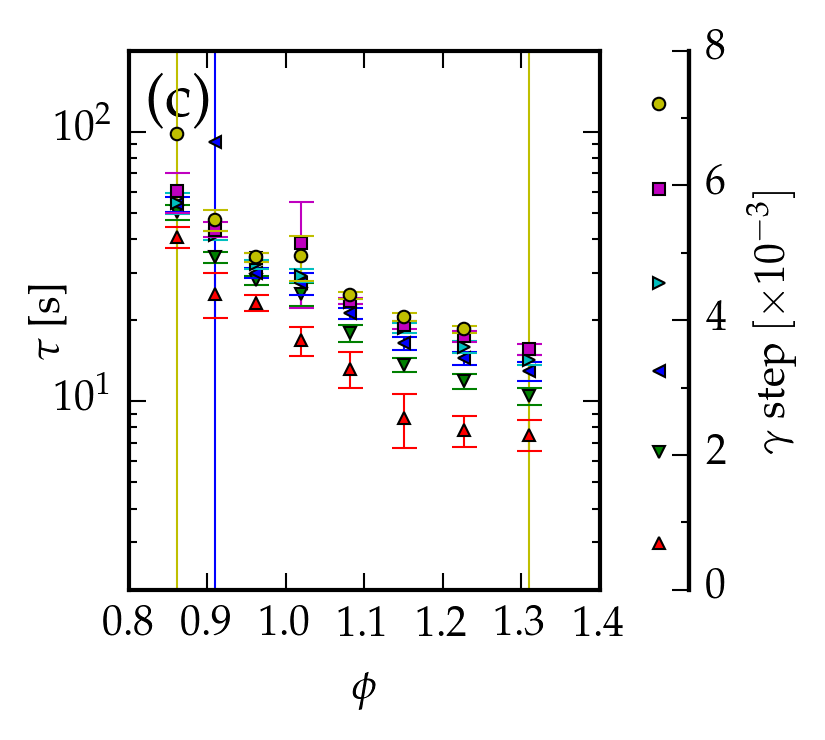

In [98]:
halffig()

subplotlabel('(c)')
subplots_adjust(left=0.16)

cmap = NPcmap
#norm = mpl.colors.Normalize(vmin=0, vmax=1e-2)
norm = mpl.colors.LogNorm(vmin=5e-4, vmax=1e-2)

for L in np.unique(Ls):
    for color, marker, gammastep in zip(colors, markers, validsteps):
        msk = (L == Ls) * (gammastep == gammasteps)
        
        staus = taus[msk]
        mtau = np.mean(staus)
        #htau = np.amax(staus)
        #ltau = np.amin(staus)
        stau = np.std(staus)
        
        ltau = max(mtau-stau, 1e-6)
        htau = mtau+stau
        
        
        
        plt.errorbar(
            0.842 * (Aj / L**2),
            mtau,
            yerr=[[mtau-ltau], [htau-mtau]],
            marker=marker,
            color=color,
            ms=3,
            lw=0.5,
        )
        
        
plt.semilogy()
plt.axis(xmin=0.8, xmax=1.4, ymax=200, ymin=2)        

plt.scatter([-100], [-100], c=[1e-4], cmap=cmap, norm=norm)
#cb = plt.colorbar()
#cb.set_label(r'$\gamma$ step', labelpad=-10 )
#cb.set_label(r'$\gamma$ step $[\times 10^{-3}]$', labelpad=0 )
#t = np.array([0,2,4,6,8,10]) * 1e-3
#cb.set_ticks(t)
#cb.set_ticklabels(["%i" % i for i in t/1e-3])

plt.ylabel(r"$\tau$ [s]", labelpad=-4)
plt.xlabel(r"$\phi$")

#savefig('tau-vs-phi.pdf')


fraction = 0.11
ax = plt.gca()
base_ax, _ = matplotlib.colorbar.make_axes(ax, fraction=fraction)
print base_ax.bbox
base_ax.set_xticks([])
base_ax.set_yticks([])

ax = plt.twinx()
for sp in ['top', 'left', 'bottom']:
    base_ax.spines[sp].set_visible(False)
    ax.spines[sp].set_visible(False)

plt.axis(xmin=0, xmax=1, ymin=0, ymax=8e-3)

ticks = np.array([0,2,4,6,8])
ax.set_yticks(ticks * 1e-3)
ax.set_yticks(np.array([1,3,5,7])*1e-3, minor=True)
ax.set_yticklabels(ticks)

#for pos, tick in zip(ticks, ax.yaxis.get_majorticklabels()):
#    print tick.get_position()
#    tick.set_x(0.25)
#    tick.set_y(pos / 1.05)
#    tick.set_y = lambda x: None

plt.ylabel(r"$\gamma$ step $[\times 10^{-3}]$")

for color, marker, gammastep in zip(colors, markers, validsteps):
    plt.plot(0.5, gammastep/2, clip_on=False, marker=marker, color=color, ms=3)
    
plt.savefig('tau-vs-phi-log-errorbars.pdf')

TransformedBbox(Bbox([[0.8175, 0.19], [0.85, 0.94]]), BboxTransformTo(TransformedBbox(Bbox([[0.0, 0.0], [2.3961634386, 2.3961634386]]), Affine2D(array([[ 80.,   0.,   0.],
       [  0.,  80.,   0.],
       [  0.,   0.,   1.]])))))
\includegraphics{notebooks/biax-step-shear/tau-vs-phi-log-errorbars-ook-I.pdf}


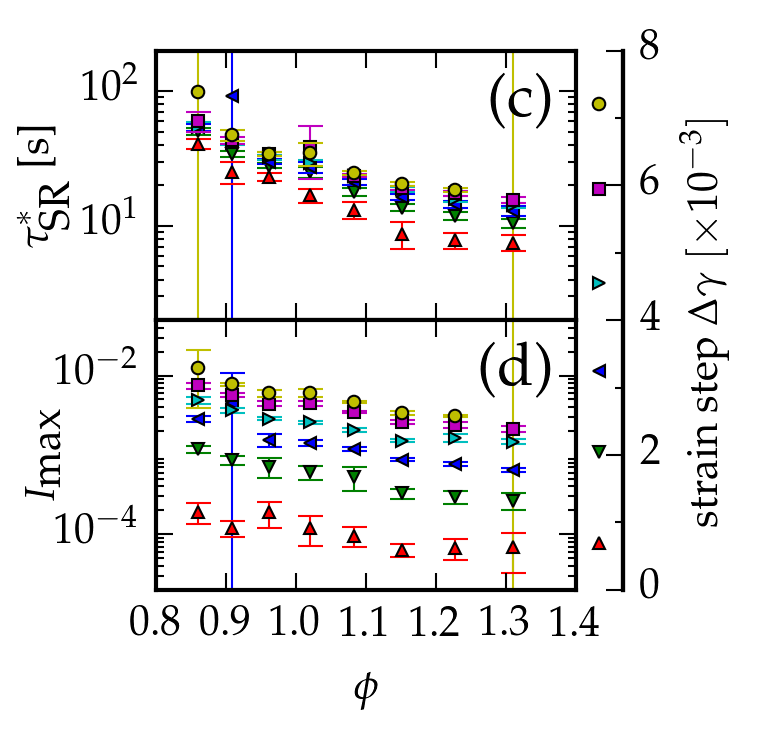

In [11]:
halffig()
reset_subplots_adjust()
subplots_adjust(left=0.2, right=0.85)

ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

subplotlabel('(c)', ax=ax1, loc='upper right', zorder=3)
subplotlabel('(d)', ax=ax2, loc='upper right', zorder=3)


cmap = NPcmap
#norm = mpl.colors.Normalize(vmin=0, vmax=1e-2)
norm = mpl.colors.LogNorm(vmin=5e-4, vmax=1e-2)

for L in np.unique(Ls):
    for color, marker, gammastep in zip(colors, markers, validsteps):
        msk = (L == Ls) * (gammastep == gammasteps)
        
        staus = taus[msk]
        mtau = np.mean(staus)
        #htau = np.amax(staus)
        #ltau = np.amin(staus)
        stau = np.std(staus)
        
        ltau = max(mtau-stau, 1e-6)
        htau = mtau+stau
        
        ax1.errorbar(
            0.842 * (Aj / L**2),
            mtau,
            yerr=[[mtau-ltau], [htau-mtau]],
            marker=marker,
            color=color,
            ms=3,
            lw=0.5,
        )
        
        sIs = Is[msk]
        mI = np.mean(sIs)
        sI = np.std(sIs)
        
        lI = max(mI-sI, 1e-6)
        hI = mI+sI
        
        ax2.errorbar(
            0.842 * (Aj / L**2),
            mI,
            yerr=[[mI-lI], [hI-mI]],
            marker=marker,
            color=color,
            ms=3,
            lw=0.5,
        )        
        
        
ax1.semilogy()
ax1.axis(xmin=0.8, xmax=1.4, ymax=200, ymin=2)     
ax2.semilogy()
ax2.axis(xmin=0.8, xmax=1.4, ymin=2e-5, ymax=5e-2)   

ax1.set_ylabel(r"$\tau^*_{\textrm{SR}}$ [s]", labelpad=0)
ax1.set_xticklabels([])
ax2.set_yticks([1e-4,1e-2])
ax2.set_ylabel(r"$I_\textrm{max}$", labelpad=-4)
ax2.set_xlabel(r"$\phi$")

#savefig('tau-vs-phi.pdf')


fraction = 0.05
ax = [ax1,ax2]
base_ax, _ = matplotlib.colorbar.make_axes(ax, fraction=fraction)
print base_ax.bbox
base_ax.set_xticks([])
base_ax.set_yticks([])

ax = plt.twinx()
for sp in ['top', 'left', 'bottom']:
    base_ax.spines[sp].set_visible(False)
    ax.spines[sp].set_visible(False)

plt.axis(xmin=0, xmax=1, ymin=0, ymax=8e-3)

ticks = np.array([0,2,4,6,8])
ax.set_yticks(ticks * 1e-3)
ax.set_yticks(np.array([1,3,5,7])*1e-3, minor=True)
ax.set_yticklabels(ticks)

#for pos, tick in zip(ticks, ax.yaxis.get_majorticklabels()):
#    print tick.get_position()
#    tick.set_x(0.25)
#    tick.set_y(pos / 1.05)
#    tick.set_y = lambda x: None

plt.ylabel(r"strain step $\Delta\gamma~[\times 10^{-3}]$")

for color, marker, gammastep in zip(colors, markers, validsteps):
    plt.plot(0, gammastep/2, clip_on=False, marker=marker, color=color, ms=3)
    
plt.savefig('tau-vs-phi-log-errorbars-ook-I.pdf')

\includegraphics{notebooks/biax-step-shear/tau-vs-phi.pdf}


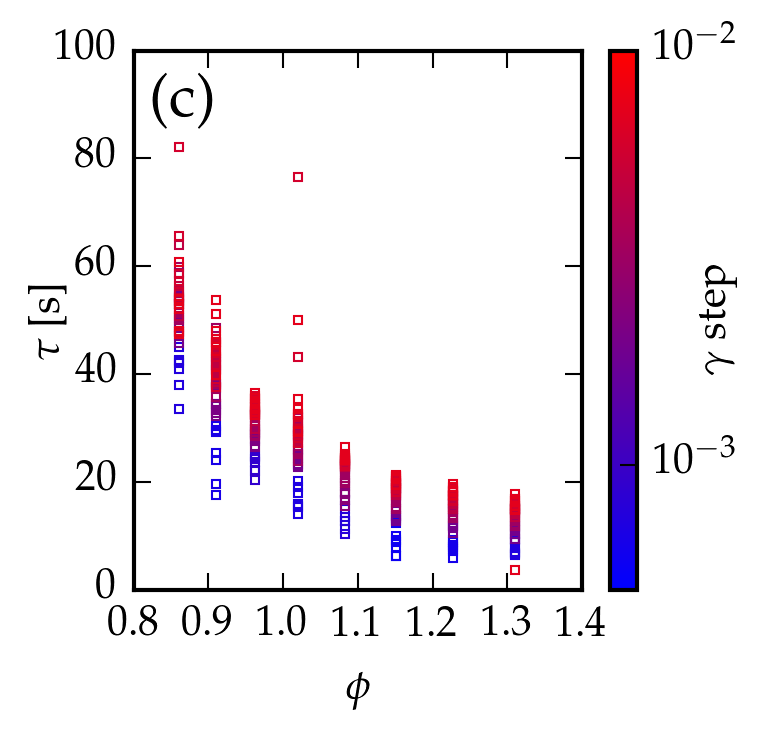

In [11]:
halffig()
subplotlabel('(c)')
subplots_adjust(left=0.16)

cmap = NPcmap
#norm = mpl.colors.Normalize(vmin=0, vmax=1e-2)
norm = mpl.colors.LogNorm(vmin=5e-4, vmax=1e-2)

   

for L,dL,I,tau in np.array(values):
    gammastep = 0.25*2*(dL/L)  # 4 steps, but in two directions so x2
    
    plt.plot(0.842 * (Aj / L**2), tau,"s",color="none",mec=cmap(norm(gammastep)), ms=2)
    
plt.axis(xmin=0.8, xmax=1.4, ymax=100)    
plt.scatter([-100], [-100], c=[1e-4], cmap=cmap, norm=norm)
cb = plt.colorbar()
cb.set_label(r'$\gamma$ step', labelpad=-10 )
#cb.set_label(r'$\gamma$ step $[\times 10^{-3}]$', labelpad=0 )
#t = np.array([0,2,4,6,8,10]) * 1e-3
#cb.set_ticks(t)
#cb.set_ticklabels(["%i" % i for i in t/1e-3])

plt.ylabel(r"$\tau$ [s]", labelpad=-4)
plt.xlabel(r"$\phi$")

savefig('tau-vs-phi.pdf')

\includegraphics{notebooks/biax-step-shear/tau-vs-phi-log.pdf}


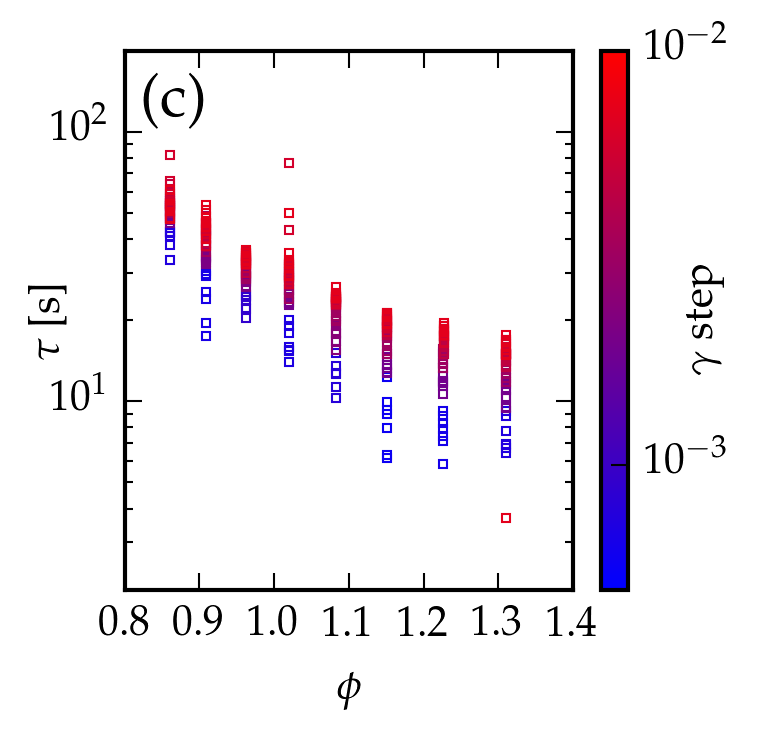

In [9]:
halffig()
subplotlabel('(c)')
subplots_adjust(left=0.16)

L,dL,tau = np.array(values).T

cmap = NPcmap
#norm = mpl.colors.Normalize(vmin=0, vmax=1e-2)
norm = mpl.colors.LogNorm(vmin=5e-4, vmax=1e-2)

for L,dL,tau in np.array(values):
    gammastep = 0.25*2*(dL/L)  # 4 steps, but in two directions so x2
    
    plt.plot(0.842 * (Aj / L**2), tau,"s",color="none",mec=cmap(norm(gammastep)), ms=2)

plt.semilogy()
plt.axis(xmin=0.8, xmax=1.4, ymax=200, ymin=2)    
plt.scatter([-100], [-100], c=[1e-4], cmap=cmap, norm=norm)

cb = plt.colorbar()
cb.set_label(r'$\gamma$ step', labelpad=-11 )

plt.ylabel(r"$\tau$ [s]", labelpad=-5)
plt.xlabel(r"$\phi$")
plt.savefig('tau-vs-phi-log.pdf')

In [64]:
plt.ioff()

data = []

for path in paths:
    ts, frame_id, Bpos, CDpos = np.loadtxt(path + "/position.csv").T
    first = load_im(path, Bpos, CDpos, frame_id, 0)
    last = load_im(path, Bpos, CDpos, frame_id, len(ts)-1)
    var = np.mean((last - first)**2)
    
    L = (zeroB + Bpos[0]) * px_per_tick
    dL = (np.amax(Bpos) - np.amin(Bpos)) * px_per_tick
    
    data.append([L, dL, var])
    
    #plt.figure()
    #plt.imshow(first-last, vmin=-0.1, vmax=0.1, cmap='RdBu')
    #p,name = os.path.split(path)
    #plt.title("%.3e" % var)
    #plt.savefig(os.path.join(p, "diffs", name + ".png"))
    #plt.close()

C:\Python27\lib\site-packages\ipykernel\__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


\includegraphics{notebooks/biax-step-shear/imvar-vs-gammamax-and-phi.pdf}


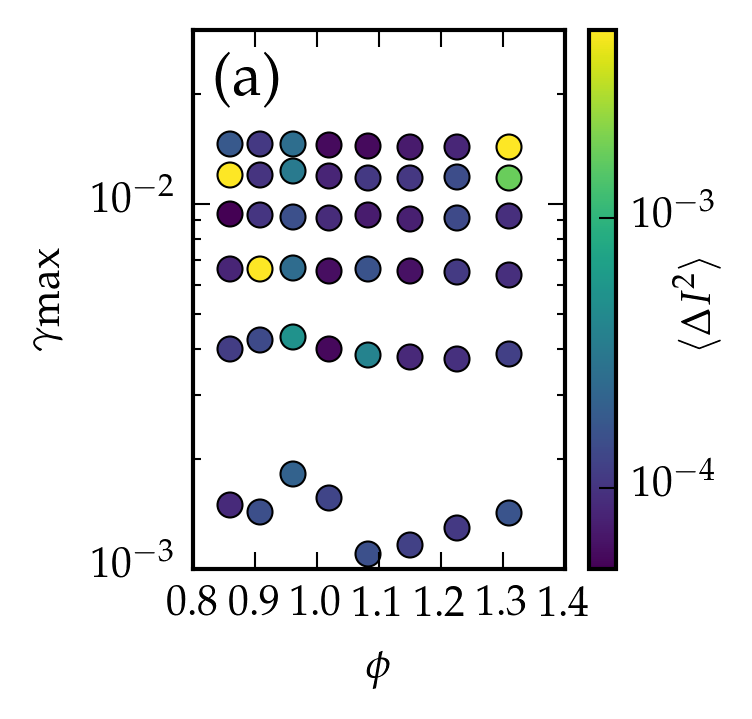

In [69]:
f = halffig()

cmap = get_cmap('viridis')
norm = mpl.colors.LogNorm(vmin=5e-5, vmax=5e-3)
#norm = mpl.colors.Normalize(vmin=0, vmax=2e-4)


for L,dL,var in data:
    plt.plot(0.842 * (Aj / L**2), dL/L, color=cmap(norm(var)), marker="o")

plt.semilogy()
plt.ylabel(r"$\gamma_\textrm{max}$")
plt.xlabel(r"$\phi$")
plt.axis(xmin=0.8, xmax=1.4, ymin=1e-3, ymax=3e-2)
plt.scatter([-100], [-100], c=[1e-4], cmap=cmap, norm=norm)
cb = plt.colorbar(fraction=0.2)
cb.set_label(r'$\langle \Delta I^2 \rangle$', labelpad=-10 )

subplotlabel('(a)')

savefig('imvar-vs-gammamax-and-phi.pdf')